In [1]:
import pandas as pd
import numpy as np
# Load the dataset
wine_data = pd.read_csv('wine.csv')

# Basic data exploration
print(wine_data.head())
print(wine_data.info())
print(wine_data.describe())


   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           No

In [2]:
wine_data.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [3]:
wine_data.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


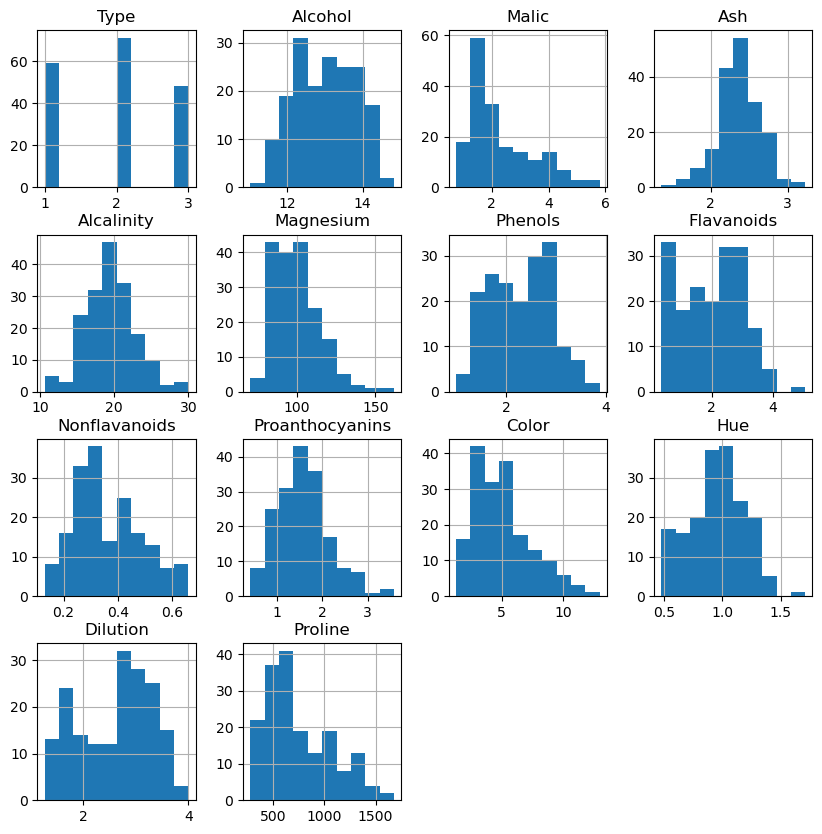

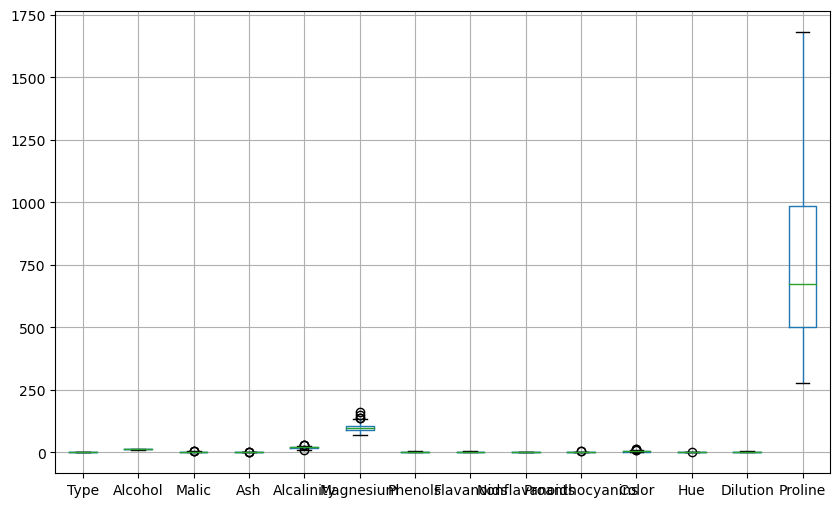

In [5]:
import matplotlib.pyplot as plt

# Histograms
wine_data.hist(figsize=(10, 10))
plt.show()

# Box plots
wine_data.boxplot(figsize=(10, 6))
plt.show()


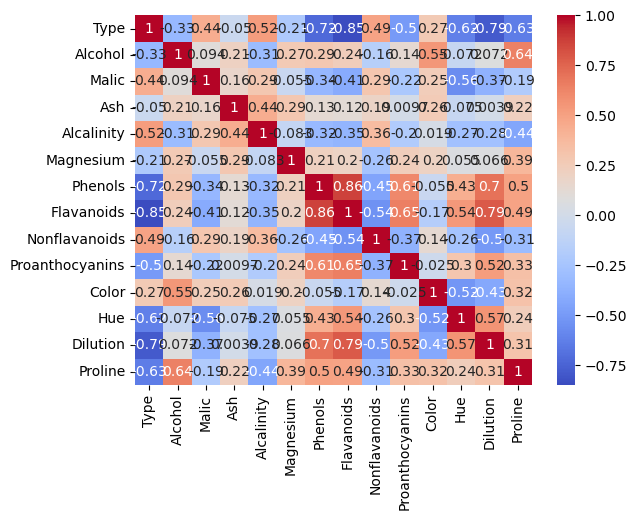

In [6]:
import seaborn as sns

# Correlation matrix
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize features
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_data)

# Implement PCA
pca = PCA()
wine_pca = pca.fit_transform(wine_scaled)


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize features
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_data)

# Implement PCA
pca = PCA()
wine_pca = pca.fit_transform(wine_scaled)


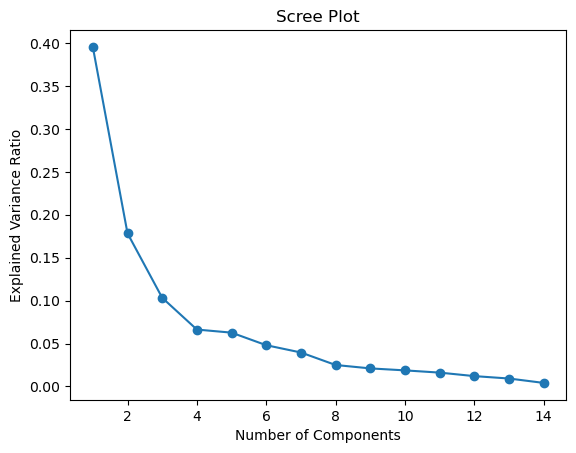

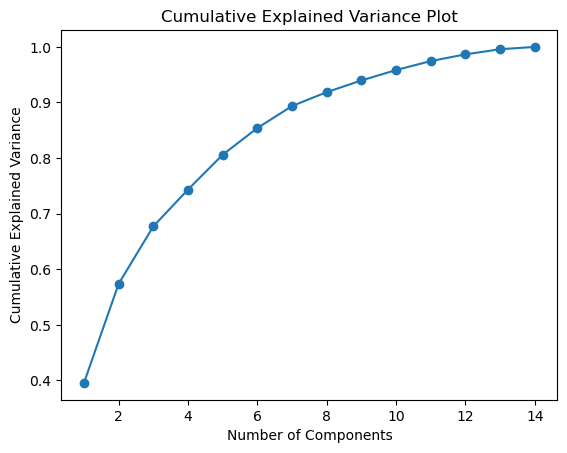

In [9]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()


In [10]:
# Transform the original dataset into principal components
wine_pca_df = pd.DataFrame(data=wine_pca, columns=[f'PC{i}' for i in range(1, len(wine_data.columns) + 1)])


In [11]:
###########################################################

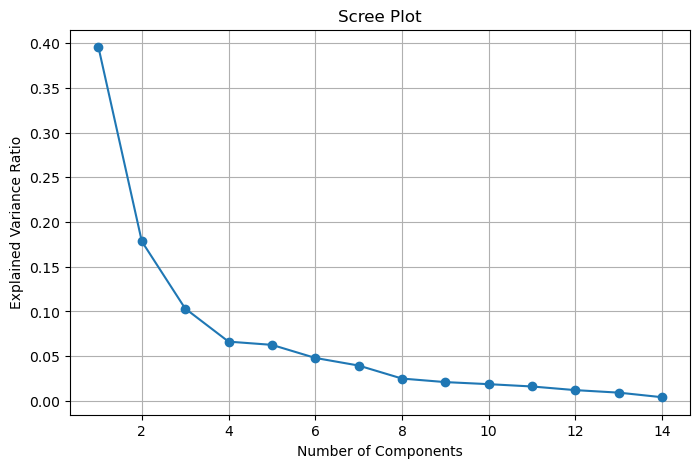

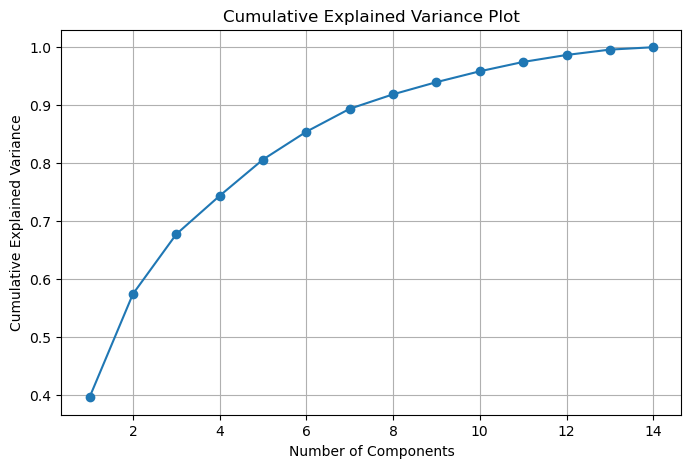

In [12]:
import numpy as np

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()


In [13]:
# Using the first 2 principal components
pca_2 = PCA(n_components=2)
wine_pca_2 = pca_2.fit_transform(wine_scaled)

# Transform the original dataset into the first 2 principal components
wine_pca_df_2 = pd.DataFrame(data=wine_pca_2, columns=['PC1', 'PC2'])


In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Apply K-means clustering
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_original.fit(wine_scaled)

# Add the cluster labels to the original data
wine_data['Cluster_Original'] = kmeans_original.labels_


C:\Users\Reshma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\Reshma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


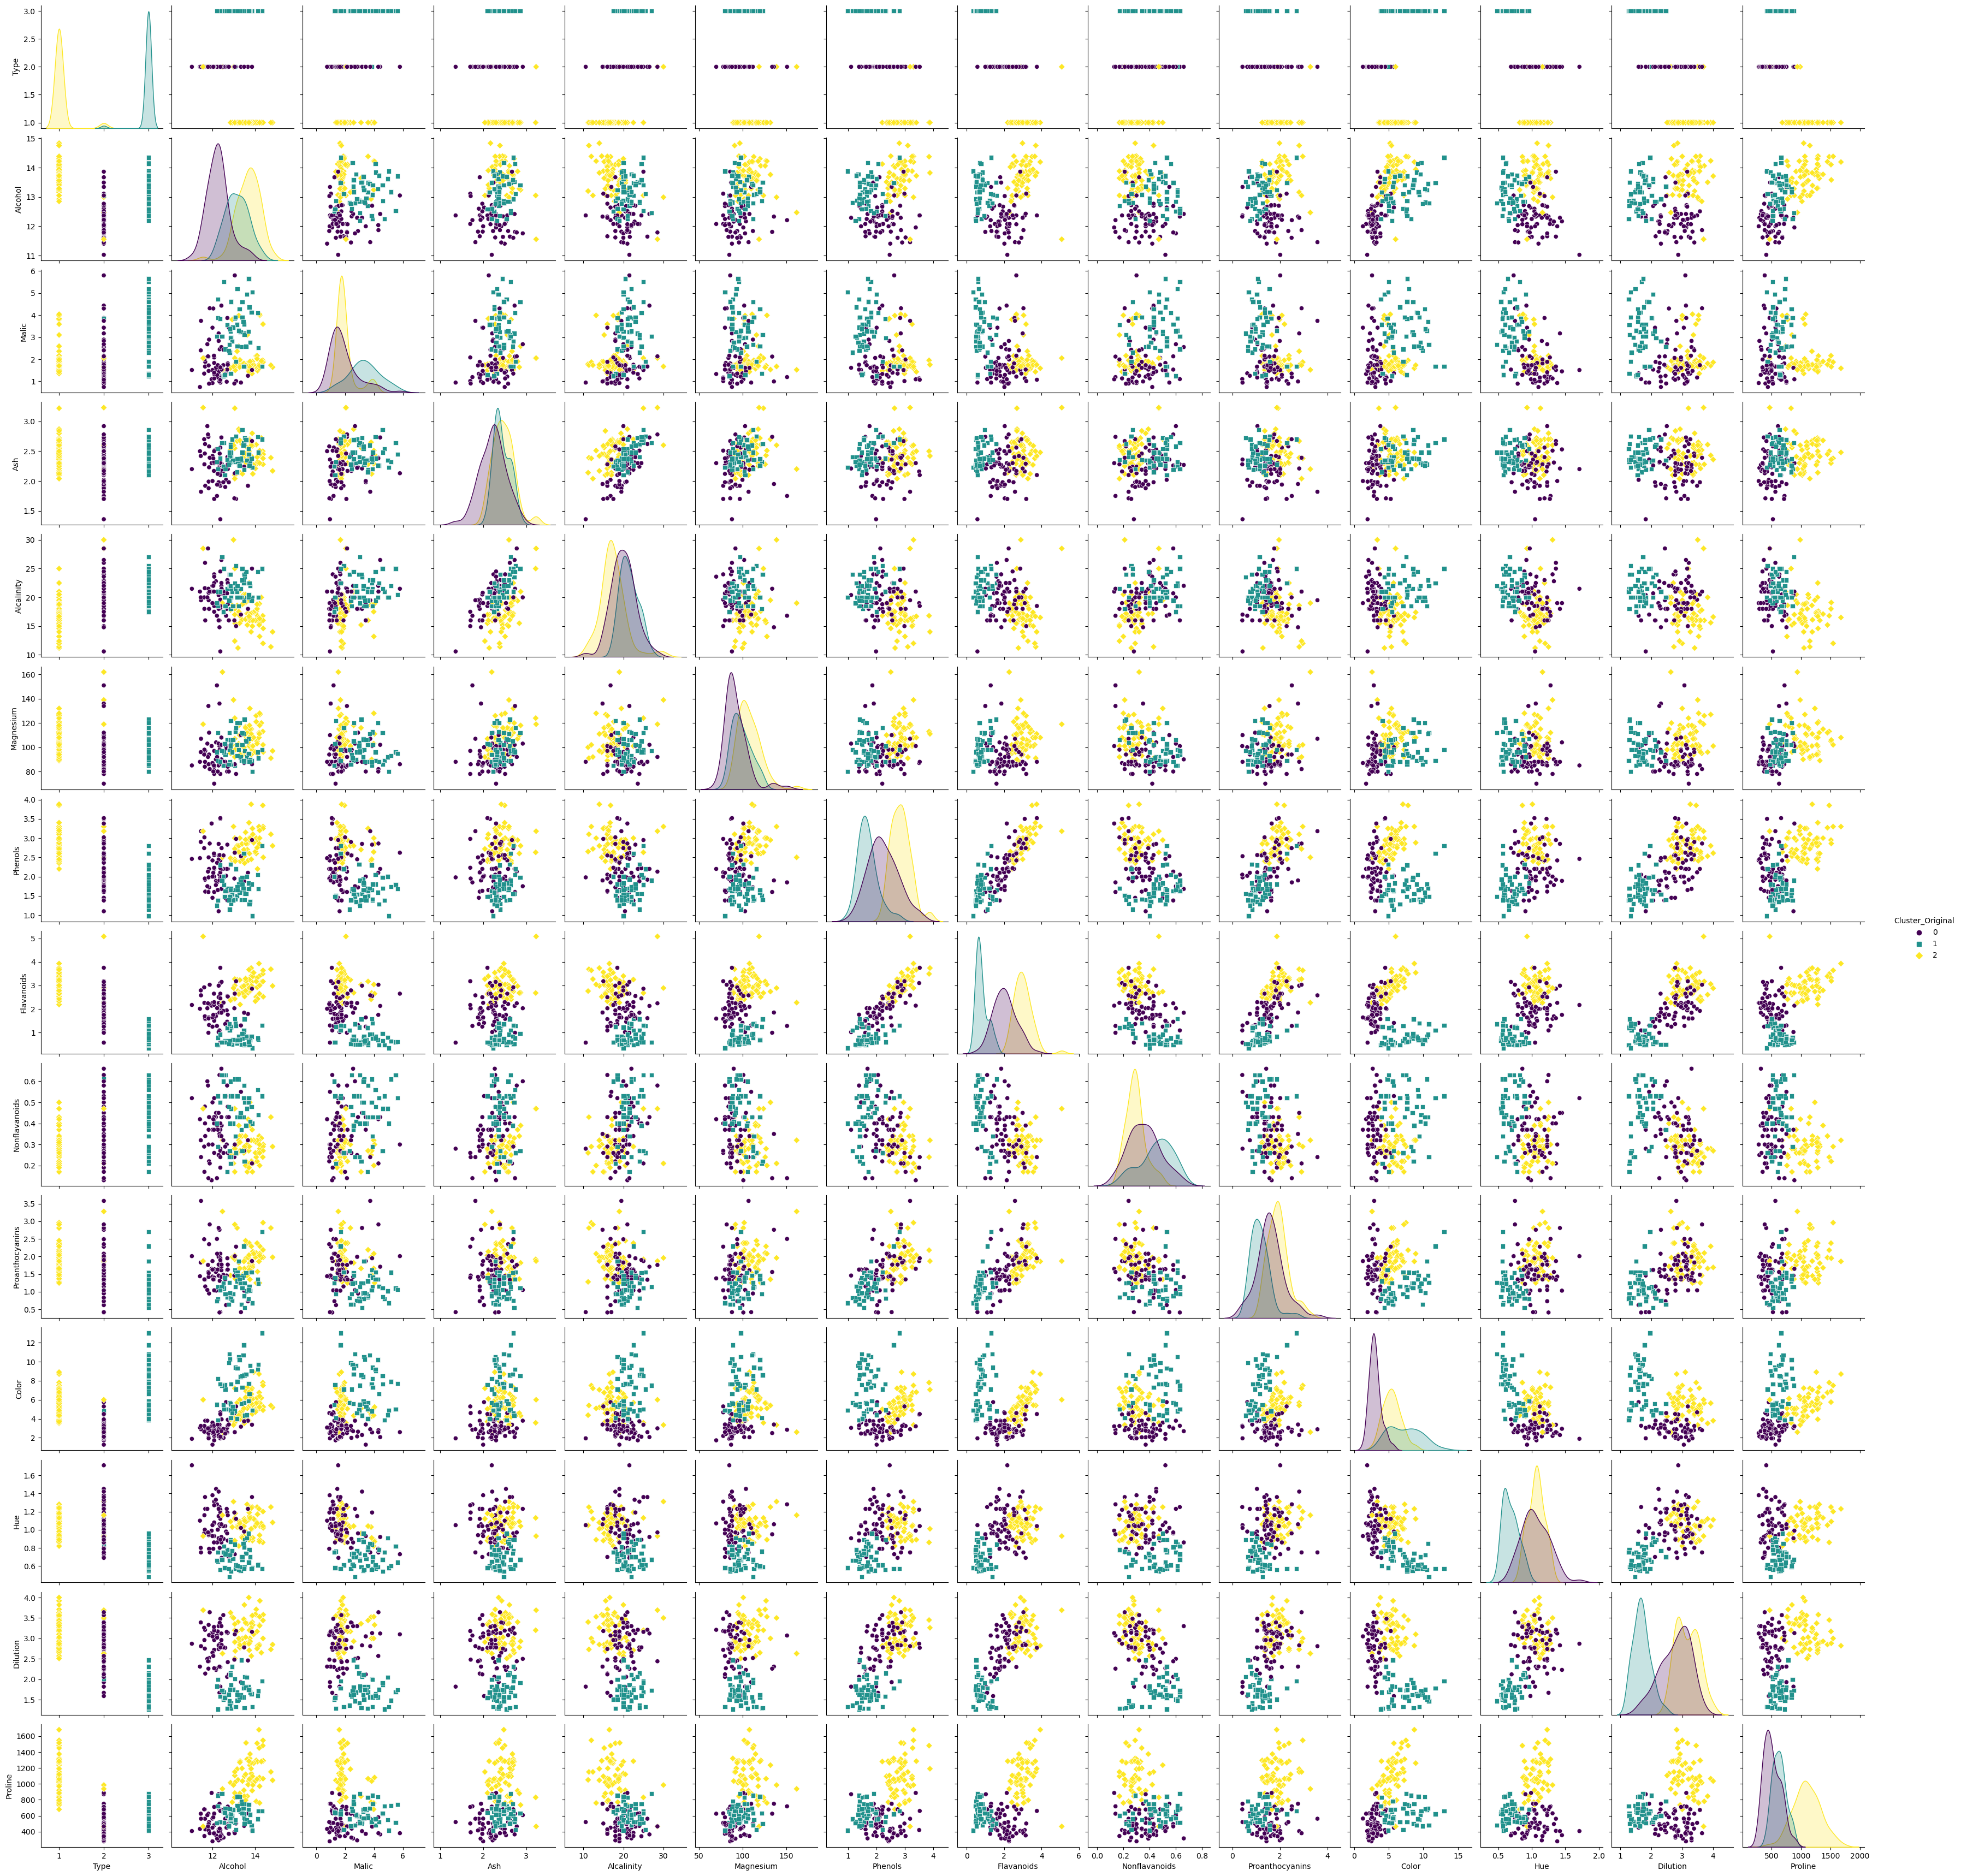

In [15]:
sns.pairplot(wine_data, hue='Cluster_Original', palette='viridis', markers=['o', 's', 'D'])
plt.show()


In [16]:
# Calculate silhouette score
silhouette_original = silhouette_score(wine_scaled, kmeans_original.labels_)
print(f'Silhouette Score (Original Data): {silhouette_original}')

# Calculate Davies-Bouldin index
davies_bouldin_original = davies_bouldin_score(wine_scaled, kmeans_original.labels_)
print(f'Davies-Bouldin Index (Original Data): {davies_bouldin_original}')


Silhouette Score (Original Data): 0.30648398324833453
Davies-Bouldin Index (Original Data): 1.315707552261773


In [17]:
# Apply K-means clustering to PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(wine_pca_2)

# Add the cluster labels to the PCA data
wine_pca_df_2['Cluster_PCA'] = kmeans_pca.labels_


C:\Users\Reshma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


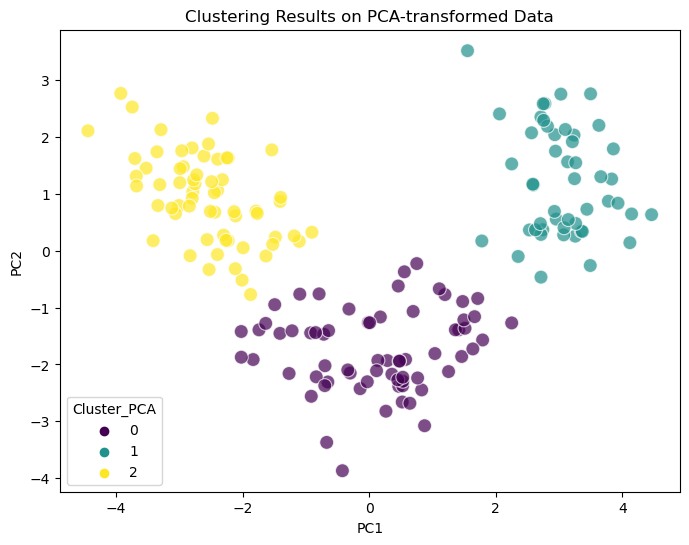

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=wine_pca_df_2, x='PC1', y='PC2', hue='Cluster_PCA', palette='viridis', s=100, alpha=0.7)
plt.title('Clustering Results on PCA-transformed Data')
plt.show()


In [19]:
# Calculate silhouette score for PCA-transformed data
silhouette_pca = silhouette_score(wine_pca_2, kmeans_pca.labels_)
print(f'Silhouette Score (PCA Data): {silhouette_pca}')

# Calculate Davies-Bouldin index for PCA-transformed data
davies_bouldin_pca = davies_bouldin_score(wine_pca_2, kmeans_pca.labels_)
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}')


Silhouette Score (PCA Data): 0.6024415520362845
Davies-Bouldin Index (PCA Data): 0.5397078562575711


In [20]:
print(f'Silhouette Score (Original Data): {silhouette_original}')
print(f'Davies-Bouldin Index (Original Data): {davies_bouldin_original}')
print(f'Silhouette Score (PCA Data): {silhouette_pca}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}')


Silhouette Score (Original Data): 0.30648398324833453
Davies-Bouldin Index (Original Data): 1.315707552261773
Silhouette Score (PCA Data): 0.6024415520362845
Davies-Bouldin Index (PCA Data): 0.5397078562575711
